In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# Introduction to Neural Networks for Regression (Outcome is 1)


*   How much or How many????
*   ML algo needs input in form of numbers. strings are needed to be one hot encoded or label encoded.


## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias `tf` (short for TensorFlow).

## Creating data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

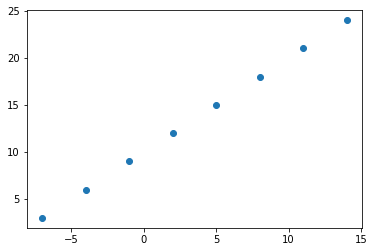

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and Output 


*  The input shape is the shape of your data that goes into the model.

*  The output shape is the shape of your data you want to come out of your model.



In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

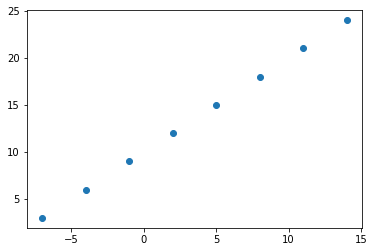

In [ ]:
plt.scatter(X,y)

In [ ]:
X = tf.cast(tf.constant(X),dtype = 'float32')
y = tf.cast(tf.constant(y),dtype = 'float32')


In [ ]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

## Steps in modelling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.


In [ ]:
#set random seed
tf.random.set_seed(40)

# 1. create the model using keras library in tensorflow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model 
model.compile(loss = 'mae', # Mean absolute error
              optimizer = 'sgd', # Stochastic Gradient Descent
              metrics = ['mae'])

# 3. fir the model 
model.fit(X,y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 487ms/step - loss: 12.9528 - mae: 12.9528
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 12.8203 - mae: 12.8203
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 12.6878 - mae: 12.6878
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 12.5553 - mae: 12.5553
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 12.4228 - mae: 12.4228


In [ ]:
y_pred = model.predict([17.0])
y_pred

array([[5.6827435]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [ ]:
#increasing the number of epochs

# 1. creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model 
model.compile(loss='mae',
              optimizer = 'sgd',
              metrics = ['mae'])

# 3. fit the model
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 265ms/step - loss: 10.5082 - mae: 10.5082
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3757 - mae: 10.3757
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2432 - mae: 10.2432
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1107 - mae: 10.1107
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9782 - mae: 9.9782
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.8457 - mae: 9.8457
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7132 - mae: 9.7132
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5807 - mae: 9.5807
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4482 - mae: 9.4482
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3157 - mae: 9.3157
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - los

In [ ]:
#predict the value
y_pred = model.predict([17])
y_pred



array([[30.219063]], dtype=float32)

**Still not that accurate even after increasing the epochs**

In [ ]:
#Adding a hidden layer with 100 units else to make the model run more accurately

# 1. creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. compiling the model 
model.compile(loss = tf.losses.mae,
             optimizer = 'sgd',
             metrics = ['mae'])
# 3. fitting the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 347ms/step - loss: 14.0764 - mae: 14.0764
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.6210 - mae: 13.6210
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.1690 - mae: 13.1690
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.7164 - mae: 12.7164
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 12.2631 - mae: 12.2631
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.8017 - mae: 11.8017
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3288 - mae: 11.3288
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8405 - mae: 10.8405
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3432 - mae: 10.3432
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 9.8221 - mae: 9.8221
Epoch 11/100
1/1 [==============================] - 0s 4m

In [ ]:
#predicting the value
y_pred1  = model.predict([17.0])
y_pred1

array([[32.162663]], dtype=float32)

**though the mae is small still its not working as good as the earlier model this can be due to OVERFITTING**

###Common Ways to Improve the model
*  Adding Layers
*  Increase the number of hidden units 
*  Change the activation functions
*  Change the optimization functions
*  Change the learning rate
*  Fitting more data
*  Fitting for longer


In [ ]:
#Adding a hidden layer with 100 units else to make the model run more accurately

# 1. creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

# 2. compiling the model 
model.compile(loss = tf.losses.mae,
             optimizer = tf.optimizers.Adam(learning_rate= 0.01),
             metrics = ['mae'])
# 3. fitting the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 350ms/step - loss: 14.1176 - mae: 14.1176
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.4292 - mae: 13.4292
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7466 - mae: 12.7466
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0673 - mae: 12.0673
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3874 - mae: 11.3874
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7037 - mae: 10.7037
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0132 - mae: 10.0132
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3134 - mae: 9.3134
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.6016 - mae: 8.6016
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.8755 - mae: 7.8755
Epoch 11/100
1/1 [==============================] - 0s 5ms/step

In [ ]:
#prediciton time
y_pred2 = model.predict([17])
y_pred2

array([[26.765957]], dtype=float32)

**The most accurate model of the three**

## Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

*Visualize, visualize, visualize*

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [ ]:
#Making a bigger dataset for the model

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

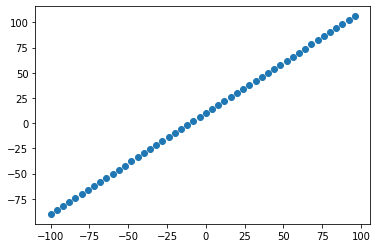

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [ ]:
X_train, y_train = X[:40], y[:40]

X_test, y_test = X[40:], y[40:]

### Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

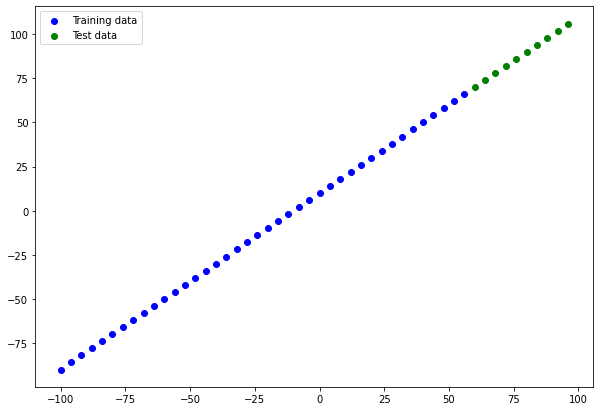

In [ ]:
plt.figure(figsize=(10,7))
# Training data as blue
plt.scatter(X_train, y_train, c = "b", label = "Training data")
# Test data as green
plt.scatter(X_test, y_test, c = "g", label = "Test data")

plt.legend()

In [ ]:
#Create the model for the Train data and predicting the test data.

# 1. Create model 
model  = tf.keras.Sequential([
   tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = 'mae',
              optimizer = 'sgd',
              metrics = ['mae'])
# 3. fit the train data only
# model.fit(X_train, y_train, epochs = 100)

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's Create a model which builds automatically by defining the input_shape argument 
tf.random.set_seed(42)
# 1. Create the model by giving the input shape argument 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None,input_shape = [1]),
    tf.keras.layers.Dense(1)
])

# 2. compiling the model 
model.compile(loss = tf.losses.mae,
             optimizer = tf.optimizers.Adam(learning_rate= 0.01),
             metrics = ['mae'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains. (**also known as Weights and biases**)
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during **transfer learning**).

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

> 🛠 **Exercise:** Try playing around with the number of hidden units in the `Dense` layer (e.g. `Dense(2)`, `Dense(3)`). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.



In [ ]:
#Let's fit our model to the training data.

model.fit(X_train, y_train, epochs = 100, verbose = 0)

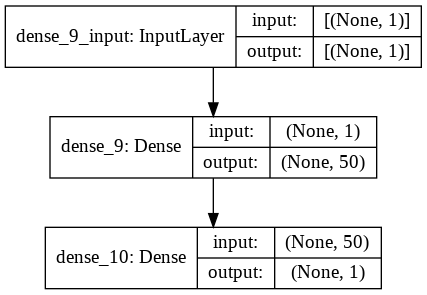

In [ ]:
#plot the model 
from tensorflow.keras.utils import plot_model

plot_model(model = model,show_shapes= True)

### Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [ ]:
y_pred3 = model.predict(X_test)
tf.reshape(y_test,shape = (10,1)), y_pred3

(<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[ 70],
        [ 74],
        [ 78],
        [ 82],
        [ 86],
        [ 90],
        [ 94],
        [ 98],
        [102],
        [106]], dtype=int32)>, array([[ 69.572266],
        [ 73.533424],
        [ 77.49459 ],
        [ 81.45575 ],
        [ 85.416916],
        [ 89.37809 ],
        [ 93.33925 ],
        [ 97.300415],
        [101.26157 ],
        [105.22274 ]], dtype=float32))

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred3):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c= "b", label = 'Training Set')
  plt.scatter(test_data, test_labels, c= "g",label = 'test Set', )
  plt.scatter(test_data,predictions, c= "r", label = 'predictions')
  plt.legend()

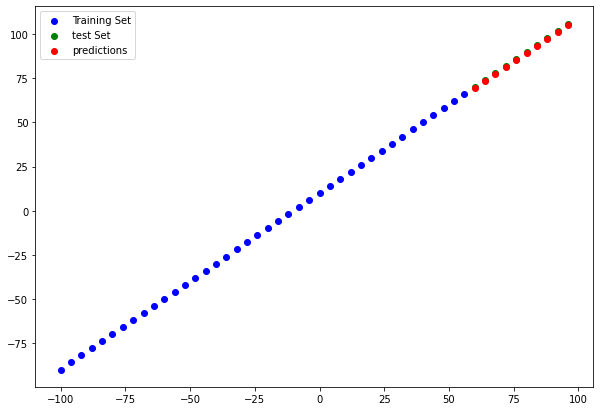

In [ ]:
plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred3)

### Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.
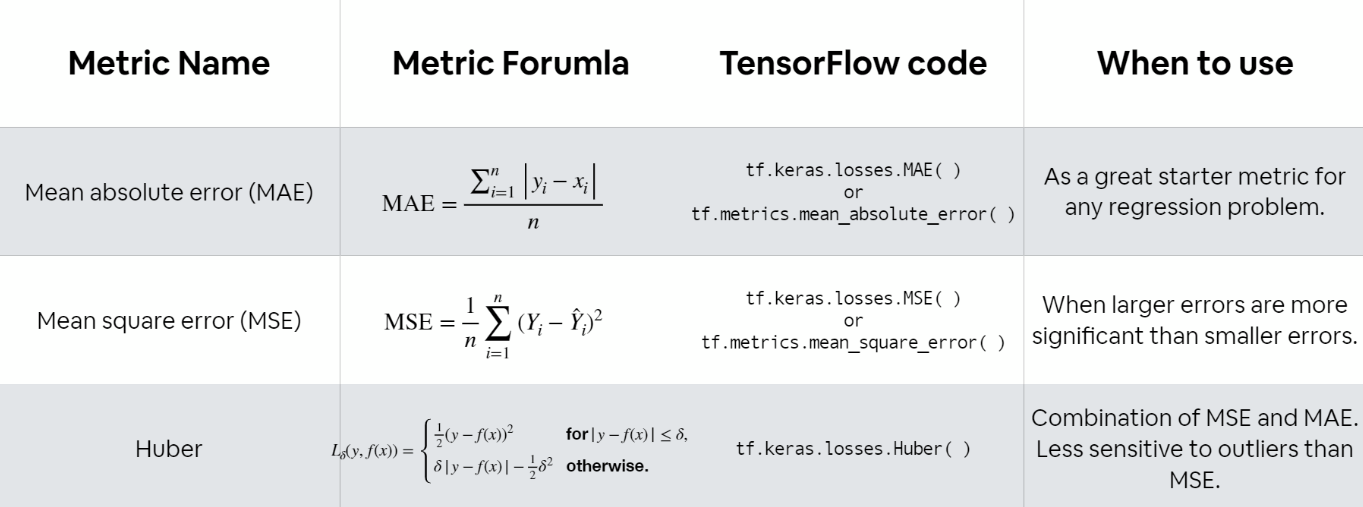

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.6025 - mae: 0.6025


[0.6024971008300781, 0.6024971008300781]

In [ ]:
y_pred3

array([[ 69.572266],
       [ 73.533424],
       [ 77.49459 ],
       [ 81.45575 ],
       [ 85.416916],
       [ 89.37809 ],
       [ 93.33925 ],
       [ 97.300415],
       [101.26157 ],
       [105.22274 ]], dtype=float32)

In [ ]:
# Evaluating loss using mean absolute error 
tf.keras.losses.MAE(y_test,tf.squeeze(y_pred3)).numpy()

0.60249865

In [ ]:
# Evaluating loss using Mean Squared error
tf.keras.losses.MSE(y_test, tf.squeeze(y_pred3)).numpy()

0.37544733

In [ ]:
# Evaluating loss using Huber
h = tf.keras.losses.Huber()
h(y_test, tf.squeeze(y_pred3)).numpy()

0.18772367

In [ ]:
# Make some function to reuse MAE and MSE or even Huber

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true,tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true,tf.squeeze(y_pred)).numpy()

def huber(y_true, y_pred):
  h = tf.keras.losses.Huber()
  return h(y_true, tf.squeeze(y_pred)).numpy()

### Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [ ]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
tf.random.set_seed(42)

# 1. Create a model : 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = [1])
])
# 2. Compile the model:
model_1.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])
model_1.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
y_pred_1 = model_1.predict(X_test)

y_pred_1

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

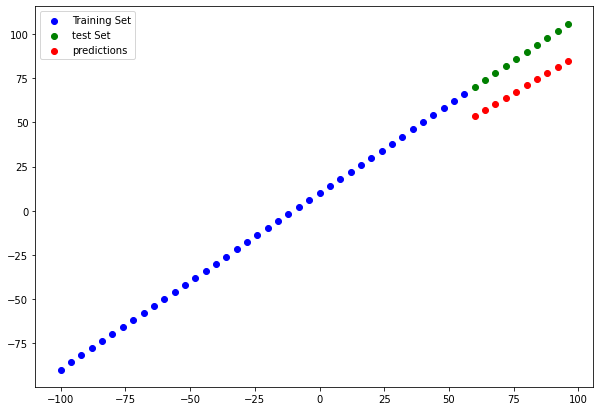

In [ ]:
plot_predictions(train_data=X_train, train_labels= y_train, test_data= X_test, test_labels= y_test, predictions = y_pred_1)

In [ ]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
huber_1 = huber(y_test, y_pred_1)

In [ ]:
mae_1, mse_1, huber_1

(18.745327, 353.57336, 18.245327)

**Build `model_2`** 

In [ ]:
# setting random seed
tf.random.set_seed(42)

# 1. Create the model_2:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape = [1]),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model_2:
model_2.compile(loss = 'mae',
                optimizer = 'sgd',
                metrics = 'mae')

# 3. fit the model_2:
model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

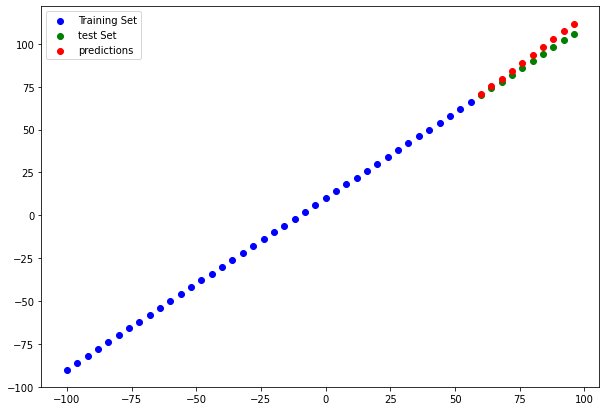

In [ ]:
plot_predictions(train_data=X_train, train_labels= y_train, test_data= X_test, test_labels= y_test, predictions = y_pred_2)


In [ ]:
mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test, y_pred_2)
huber_2 = huber(y_test, y_pred_2)

In [ ]:
mae_2, mse_2, huber_2

(3.1969407, 13.070143, 2.7069678)


**Build `model 3`**

In [ ]:
# setting the random seed
tf.random.set_seed(42)

# 1. creating the model_3
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1],activation= None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model_3
model_3.compile(loss= 'mae',
                optimizer = 'sgd',
                metrics = ['mse'])

# 3.  Fit the model_3
model_3.fit(X_train, y_train, epochs = 500, verbose =0)

In [ ]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

array([[15.854742],
       [16.617329],
       [17.379915],
       [18.142504],
       [18.905092],
       [19.667677],
       [20.430264],
       [21.192854],
       [21.95544 ],
       [22.718027]], dtype=float32)

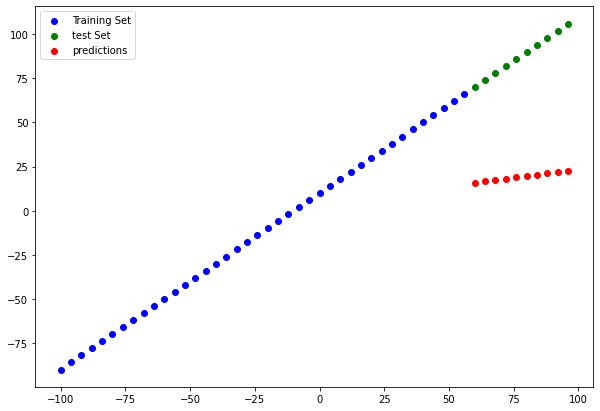

In [ ]:
plot_predictions(predictions= y_pred_3)

In [ ]:
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test, y_pred_3)
huber_3 = huber(y_test, y_pred_3)

In [ ]:
mae_3, mse_3, huber_3

(68.713615, 4808.0273, 68.213615)

### Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [ ]:
model_results = [["model_1", mae_1, mse_1, huber_1],
                 ["model_2", mae_2, mse_2, huber_2],
                 ["model_3", mae_3, mse_3, huber_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse", "huber"])
all_results

,model,mae,mse,huber
0,model_1,18.745327,353.573364,18.245327
1,model_2,3.196941,13.070143,2.706968
2,model_3,68.713615,4808.027344,68.213615


From our experiments, it looks like `model_2` performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here. 

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment. 

> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

### Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

> 📖 **Resource:** But as you build more models, you'll want to look into using tools such as:
* [**TensorBoard**](https://tensorboard.dev/) - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* [**Weights & Biases**](https://www.wandb.com/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
# Save model using SavedModel_format

model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save model using HDF5 format

model_2.save("model_model_HDF5_format.h5")



```
# This is formatted as code
```

## Loading a model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particuluar formats are correct).

In [ ]:
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()) == mae(y_test, model_2_preds.squeeze())

True

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("/content/model_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()) == mae(y_test, model_2_preds.squeeze())

True

## Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [ ]:
from google.colab import files
files.download("model_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/model_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow


In [ ]:
!ls /content/drive/MyDrive/TensorFlow

model_model_HDF5_format.h5


## A larger example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich datase.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

> 🔑 **Note:** When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [38]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
# Let's try one-hot encode our Dataframe so its all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [42]:
# Creating dependent(y) and Independent(X) varibles:
X = insurance_one_hot.drop('charges',axis = 1)
y = insurance_one_hot['charges']

In [43]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [44]:
# Splitting the data into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state =42)

In [46]:
#set random seed
tf.random.set_seed(42)

# 1. Creating the model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model.compile(loss = 'mae',
              optimizer = 'sgd',
              metrics = 'mae')

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100,verbose = 0)

In [47]:
y_pred = insurance_model.predict(X_test)
y_pred

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

**SGD was not woeking on this dataset so tried adam instead**

In [50]:
#set random seed
tf.random.set_seed(42)

# 1. Creating the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(500),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model_2.compile(loss = 'mae',
              optimizer = 'adam',
              metrics = 'mae')

#3. Fit the model
history = insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13036.5049 - mae: 13036.5049
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11194.8320 - mae: 11194.8320
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7938.0850 - mae: 7938.0850
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7419.4888 - mae: 7419.4888
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7339.1406 - mae: 7339.1406
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7287.5610 - mae: 7287.5610
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7214.6836 - mae: 7214.6836
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7148.8594 - mae: 7148.8594
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7079.4956 - mae: 7079.4956
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7005.4956 - mae: 7005.

In [52]:
# predicting the data 
y_pred_2 =insurance_model_2.predict(X_test)


In [53]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3259.1001 - mae: 3259.1001


[3259.10009765625, 3259.10009765625]

In [54]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Text(0.5, 0, 'epochs')

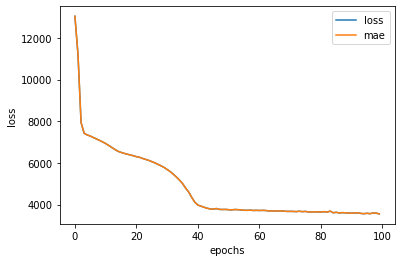

In [55]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

> 🤔 **Question:** How long should you train for? 

> It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

### Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> 📖 **Resource:** For more on preprocessing data, I'd recommend reading the following resources:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

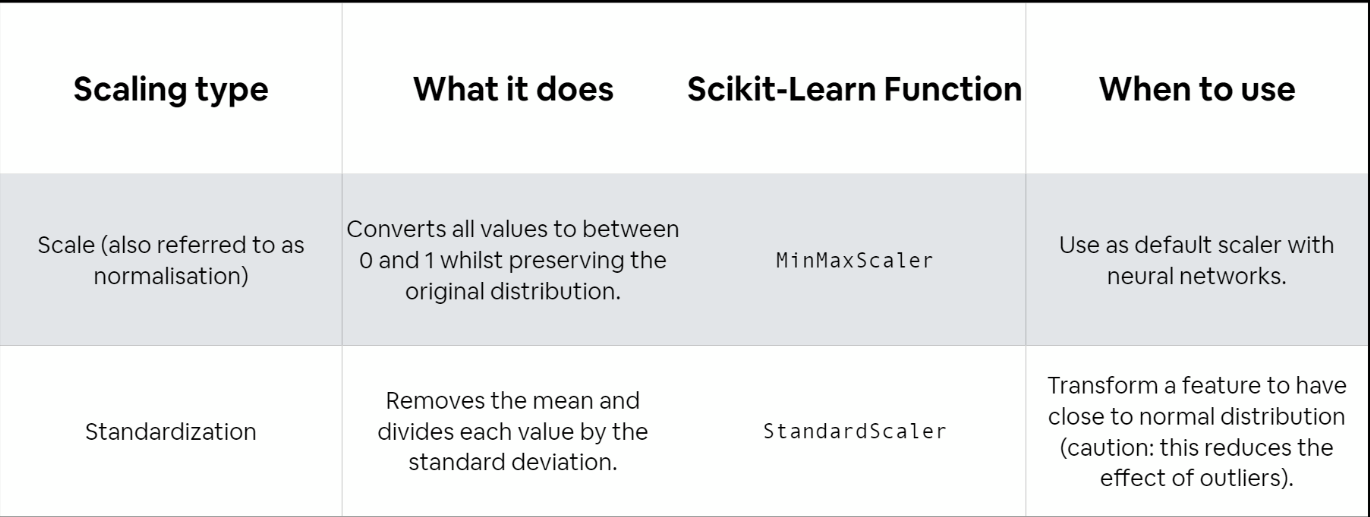

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [59]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown= "ignore"), ["sex", "smoker", "region"])
)
# create X and y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test cases
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Fit the column transformer to out training data
ct.fit(X_train)

#Transform training and test data with Normalization and OnehotEncode
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [69]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [70]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [71]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [81]:
#build the normalized model
# set random seed
tf.random.set_seed(42)

# 1. Create the insurance_model_2
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(500),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

# 2. Compile the insurance_model_2
insurance_model_3.compile(loss = 'mae',
                          optimizer = 'adam',
                          metrics = 'mae')

# 3. Fit the insurance_model_2
insurance_model_3.fit(X_train_normal,y_train,epochs =100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.7646 - mae: 13333.7646
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13230.9775 - mae: 13230.9775
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12862.2607 - mae: 12862.2607
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 11995.2725 - mae: 11995.2725
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10594.7646 - mae: 10594.7646
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9147.1660 - mae: 9147.1660
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8237.4580 - mae: 8237.4580
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7916.7446 - mae: 7916.7446
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7772.4746 - mae: 7772.4746
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7643.9106 - mae:

In [82]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3158.2229 - mae: 3158.2229


[3158.222900390625, 3158.222900390625]